<a href="https://colab.research.google.com/github/vanleiko/Biopython/blob/main/Vanessa_Leiko_Projeto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<FONT COLOR="BLUE">***0 - CALL TO ACTION***

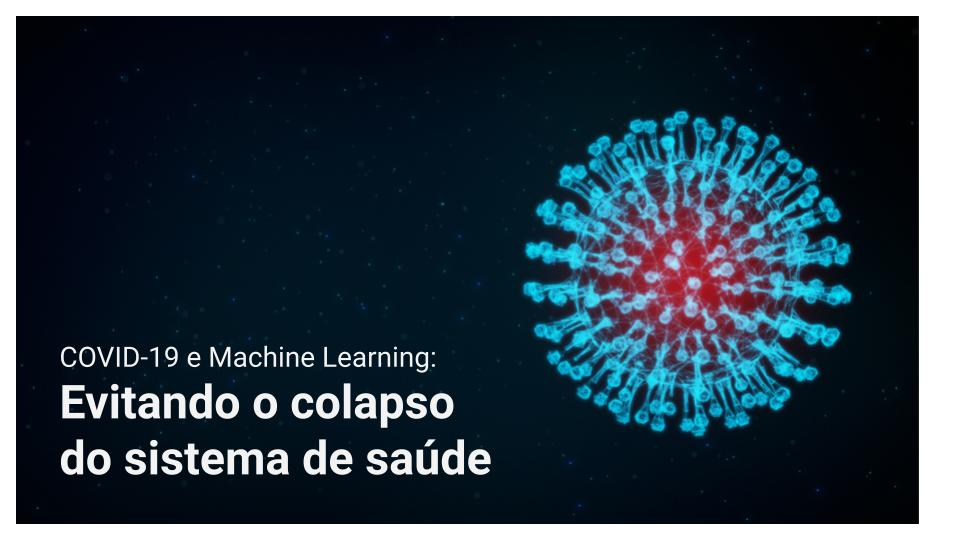

**CONTEXTO**

A pandemia do COVID-19 atingiu o mundo inteiro, sobrecarregando os sistemas de saúde, que estavam despreparados para uma solicitação tão intensa e prolongada de leitos de UTI, de profissionais, de equipamentos de proteção individual e de recursos de saúde.

O Brasil registrou o primeiro caso de COVID-19 em 26 de fevereiro de 2020 e atingiu a transmissão na comunidade em 20 de março de 2020.

O **Call to Action**, que motivou o desenvolvimento desse projeto, e o **dataset original**, podem ser encontrados [nesse link](https://www.kaggle.com/S%C3%ADrio-Libanes/covid19).

**OBJETIVO** 

Criar um modelo de Machine Learning capaz de ajudar os médicos e enfermeiros do Hospital Sírio-Libanês a prever quais pacientes precisarão ser admitidos na unidade de terapia intensiva (UTI) devido a complicações da COVID-19 e, assim, definir qual a necessidade de leitos de UTI do Hospital a partir dos dados clínicos individuais disponíveis. 

Portanto, nosso modelo deve ser capaz de classificar se um paciente irá (1) ou não irá (0) para UTI, que é a nossa variável-alvo.

**MACHINE LEARNING**

Seguindo a [definição da IBM](https://www.ibm.com/cloud/learn/machine-learning), **Machine Learning** é um ramo da Inteligência Artificial que foca na construção de algoritmos que são treinados para serem capazes de aprender com os dados e a encontrar padrões, com o objetivo de fazerem previsões e tomarem decisões a partir de novos dados.


*Workflow adaptado de [Workflow of a Machine Learning project](https://towardsdatascience.com/workflow-of-a-machine-learning-project-ec1dba419b94)*

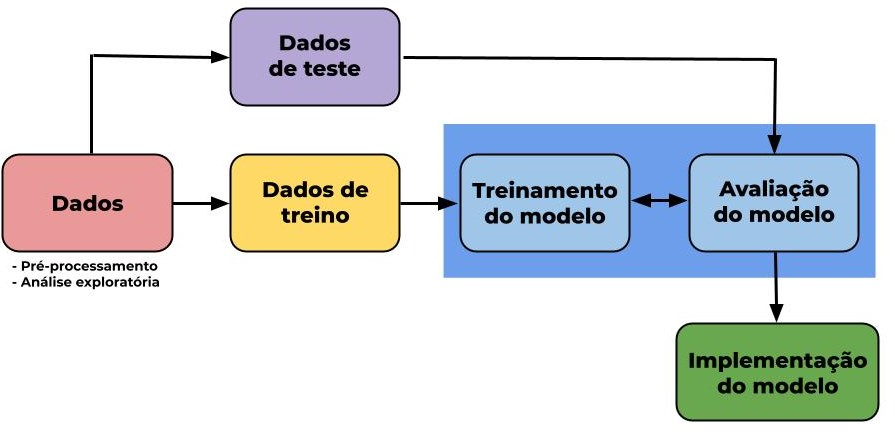

**IMPACTO DO MODELO**

Sabendo-se quantos e quando os pacientes precisarão de um leito de UTI, é possível fazer uma melhor gestão desses leitos a fim de que o Hospital não atinja sua capacidade de ocupação máxima, evitando uma ruptura do sistema. 

Antecipando essa situação, é possível:

a) preparar, com antecedência, a transferência de pacientes para UTIs de outros hospitais que tenham mais leitos disponíveis;

b) planejar o recebimento de pacientes de outros hospitais. 

<font color="red">**Informações e dicas passadas pelo próprio Hospital e que serão seguidas para construção do modelo:**

***1. Não utilizar os dados em que a variável "UTI" seja igual a 1***

Não devemos usar os dados em que a variável-alvo UTI esteja presente, pois não sabemos se aqueles dados foram coletados antes ou depois do paciente ter sido encaminhado para UTI.



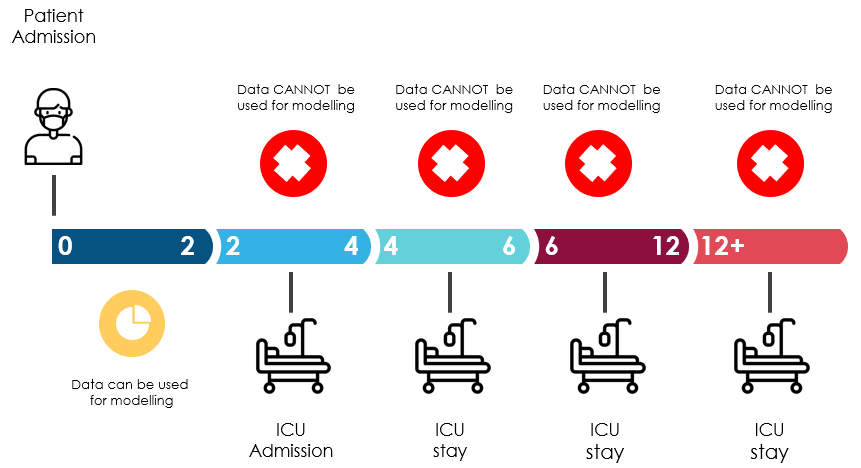

***2. É razoável admitir que pacientes que tenha alguns registros em branco estejam em situação clínica estável, apresentando sinais clínicos e vitais semelhantes ao da janela vizinha***

Pode-se preencher os valores faltantes com os valores da janela anterior ou posterior.

***3. Quanto mais cedo a previsão, melhor***

Embora o uso dos dados de todas as janelas possa gerar um modelo com maior acurácia, um bom modelo usando apenas a primeira janela (0h-2h) é clinicamente mais relevante.

<font color="green">**Variáveis do Dataset:**

**Esse dataset é composto por 54 variáveis, sendo elas:**

- Informações demográficas: 3 variáveis do tipo categórica

- Doenças pré-existentes: 9 variáveis do tipo categórica

- Exames de sangue: 36 variáveis do tipo contínua ---> quando necessário, expandidas em média, mediana, max, min, diff(max-min) e diff relativa (diff/mediana)

- Sinais vitais: 6 variáveis do tipo contínua

**Dados de saída:**

- ICU: nossa variável-alvo, que indica se o paciente foi ou não para UTI

**Janela de eventos:**

- WINDOW: janela (em horas) em que os eventos ocorreram a partir da admissão no Hospital

  - 0 - 2	
  - 2 - 4	
  - 4 - 6	
  - 6 - 12
  - Above 12



#<font color="blue">**1 - PRÉ-PROCESSAMENTO E ANÁLISE EXPLORATÓRIA DOS DADOS**



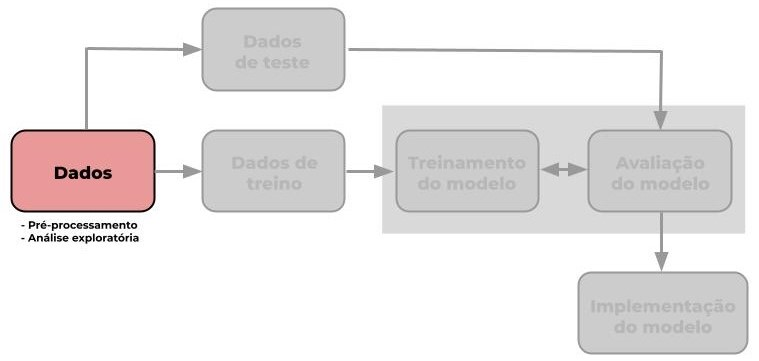

##**PARTE 1**

**1 - Remover aqueles pacientes que chegaram e foram para a UTI na janela 0-2**

Esses dados foram removidos, pois não contribuem para nosso modelo, visto que não sabemos se os dados coletados nessa janela refletem valores de exames feitos antes ou depois do paciente ter dado entrada na UTI. 

Dados coletados após o paciente ter dado entrada na UTI não devem ser usados para o modelo.

**2 - Preencher as células vazias das variáveis contínuas**

As células em branco que foram preenchidas referem-se apenas às variávies de **exames de sangue** e **sinais vitais**, que estão entre as colunas 13 até a antipenúltima coluna. 

Células em branco podem ser entendidas que o paciente encontra-se em estado clínico estável, portanto, podem ser usados os valores das células vizinhas para seu preenchimento.

**3 - Deixar apenas os dados referentes à janela 0-2 de cada paciente**

Usei aqueles dados que foram coletados durante a janela de adminissão 0-2 *(quanto mais cedo a previsão, melhor)*

  a) caso o paciente tenha ido para UTI em qualquer uma das janelas posteriores, atribuí "ICU" = 1; 

  b) caso o paciente não tenha ido para UTI nas janelas posteriores, "ICU" continuou como 0. 

  
**4 - Cada categoria do AGE_PERCENTIL foi transformada em uma coluna com valores binários**

**5 - Transformei os valores da coluna AGE_PERCENTIL de tipo categórico para tipo inteiro** 

Como a coluna "AGE_PERCENTIL" estava com valores categóricos (10th, 20th, 30th, 40th, ..., até ABOVE 90th), transformei essas categorias em um código, onde:

10th --> 0

20th --> 1

30th --> 2

40th --> 3

e assim sucessivamente, para eliminar o tipo categórico. 

**6 - Criei uma coluna para cada gênero**

A partir da coluna GENDER, criei duas colunas, GENDER_0 e GENDER_1, em que o valor 1 significa a presença da variável, e 0 a ausência da variável.

**7 - Removi os NAN que não foram preenchidos nas variáveis categóricas**

Como as células vazias das variáveis categóricas (informações demográficas e doenças pré-existentes) não podem ser preenchidas com valores de células vizinhas (visto que se referem a valores de pacientes distintos), essas células foram removidas. 

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

###**Funções**

In [104]:
'''
Essa função remove os pacientes que têm ICU == 1 na WINDOW 0-2
'''

def remove_pacientes_UTI_primeira_janela(dados):
  
  id_pacientes_para_remover = dados.query("ICU == 1 and WINDOW == '0-2'")["PATIENT_VISIT_IDENTIFIER"]  
  total_pacientes_para_remover = len(id_pacientes_para_remover)

  df_final = dados.query("PATIENT_VISIT_IDENTIFIER not in @id_pacientes_para_remover")
   
  return total_pacientes_para_remover, df_final

In [105]:
 '''
 Essa função irá preencher as células vazias das variáveis contínuas, com o método bfill e ffill
 '''
 
 def preenche_celulas_vazias(dados):

  variaveis_continuas = dados.iloc[:, 13:-2].columns

  df_continuas = dados.groupby("PATIENT_VISIT_IDENTIFIER", as_index=False)[variaveis_continuas].fillna(method="bfill").fillna(method="ffill")
  df_categoricas = dados.iloc[:, :13]
  df_categoricas_saida = dados.iloc[:, -2:]

  df_final = pd.concat([df_categoricas, df_continuas, df_categoricas_saida], axis=1, ignore_index=True)
  df_final.columns = dados.columns
  
  return df_final

In [106]:
'''
Essa função irá selecionar apenas os dados da WINDOW 0-2.
Se o paciente foi para a UTI em qualquer uma das janelas posteriores, ela atribui 1 na variável ICU.
'''

def primeira_janela(rows):
  if (np.any(rows["ICU"])):
    rows.loc[rows["WINDOW"] == "0-2", "ICU"] = 1
    
  return rows.loc[rows["WINDOW"] == "0-2"]

In [107]:
'''
Essa função irá agrupar os dados de cada paciente para apenas 1 linha (WINDOW 0-2), aplicando a função anterior
'''

def uma_linha_por_paciente(dados):
  df_final = dados.groupby("PATIENT_VISIT_IDENTIFIER", as_index=False).apply(primeira_janela)
  df_final = df_final.reset_index(drop=True)

  return df_final

In [108]:
'''
Essa função aplica o get_dummies para a feature AGE_PERCENTIL
'''

def converte_categorica_para_binaria(dados):

  df_age_percentil = pd.get_dummies(dados[["AGE_PERCENTIL"]]) 

  df_final = pd.concat([df_age_percentil, dados], axis=1)

  return df_final

In [109]:
'''
Essa função irá trocar os valores da variável AGE_PERCENTIL de categóricos para inteiros
'''

def converte_age_percentil(dados):

  dados.AGE_PERCENTIL = dados.AGE_PERCENTIL.astype("category").cat.codes
  return dados

In [110]:
'''
Essa função cria as features GENDER_0 e GENDER_1
'''

def converte_gender(dados):
  lista_valores = list(dados.GENDER)

  # essa lista receberá o valor oposto da lista anterior
  nova_lista = []

  for valor in lista_valores:
    if valor == 0:
      nova_lista.append(1)
    elif valor == 1:
      nova_lista.append(0)


  # inserir no dataframe a coluna GENDER_0 que tem os valores da nova_lista 
  dados.insert(12, "GENDER_0", nova_lista)

  # inserir no dataframe a coluna GENDER_1 que tem os valores da lista_valores
  dados.insert(13, "GENDER_1", lista_valores)

  return dados

In [111]:
'''
Essa é a FUNÇÃO PRINCIPAL que agrupa e chama todas as funções anteriores para o processamento dos dados
'''

def processa_dados(dados):

  pacientes_removidos, df1 = remove_pacientes_UTI_primeira_janela(dados)
  print(f"(1) {pacientes_removidos} pacientes removidos")

  df2 = preenche_celulas_vazias(df1)
  print("(2) Células em branco das variáveis contínuas foram preenchidas")

  df3 = uma_linha_por_paciente(df2)
  print("(3) Uma linha por paciente referente aos dados da janela 0-2")

  df4 = converte_categorica_para_binaria(df3)
  print("(4) Criada as colunas para cada categoria do AGE_PERCENTIL")

  df5 = converte_age_percentil(df4)
  print("(5) Valores da coluna do AGE_PERCENTIL convertidos para inteiros")
  
  df_final = converte_gender(df5)
  print("(6) Criadas as colunas GENDER_0 e GENDER_1\n")

  print("Todas as funções foram executadas")

  return df_final

###**Processamento dos dados**

In [112]:
# ler e salvar o arquivo com os dados
dados = pd.read_excel("https://github.com/vanleiko/bootcamp-alura/blob/main/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx?raw=true")
dados.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.333333,-0.230769,-0.132075,-0.593220,0.535714,0.578947,0.333333,-0.230769,-0.132075,-0.586207,0.535714,0.578947,0.443299,0.0000,-0.025641,-0.500000,0.714286,0.838384,-0.076923,-0.459459,-0.313433,-0.636364,0.246377,0.578947,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.994912,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,0.318681,0.898990,NaN,NaN,NaN,NaN,-0.275362,0.736842,NaN,NaN,NaN,NaN,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,-1.0,-0.871658,-0.871658,-0.871658,-0.871658,-1.0,-0.863874,-0.863874,-0.863874,-0.863874,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.414634,-0.414634,-0.414634,-0.414634,-1.0,-0.979069,-0.979069,...,-0.996762,-1.0,-0.243021,-0.338537,-0.213031,-0.317859,0.033779,0.665932,-0.283951,-0.376923,-0.188679,-0.379310,0.035714,0.631579,-0.340206,-0.4875,-0.572650,-0.857143,0.098901,0.797980,-0.076923,0.286486,0.298507,0.272727,0.362319,0.947368,-0.33913,0.325153,0.114504,0.176471,-0.238095,-0.818182,-0.389967,0.407558,

In [113]:
# quantos pacientes têm no dataset
quantidade_pacientes = len(dados["PATIENT_VISIT_IDENTIFIER"].unique())
print(f"Total de {quantidade_pacientes} pacientes deram entrada no Hospital")

Total de 385 pacientes deram entrada no Hospital


In [114]:
# Chamando a função principal para processar os dados
dados_processados = processa_dados(dados)

(1) 32 pacientes removidos
(2) Células em branco das variáveis contínuas foram preenchidas
(3) Uma linha por paciente referente aos dados da janela 0-2
(4) Criada as colunas para cada categoria do AGE_PERCENTIL
(5) Valores da coluna do AGE_PERCENTIL convertidos para inteiros
(6) Criadas as colunas GENDER_0 e GENDER_1

Todas as funções foram executadas


In [115]:
# dataframe dos dados processados
dados_processados.head()

,AGE_PERCENTIL_10th,AGE_PERCENTIL_20th,AGE_PERCENTIL_30th,AGE_PERCENTIL_40th,AGE_PERCENTIL_50th,AGE_PERCENTIL_60th,AGE_PERCENTIL_70th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER_0,GENDER_1,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,5,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-0.994912,-1.0,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
1,1,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-0.978029,-1.0,-0.489712,-0.685470,-0.048218,-0.645951,0.357143,0.935673,-0.506173,-0.815385,-0.056604,-0.517241,0.357143,0.947368,-0.525773,-0.5125,-0.111111,-0.714286,0.604396,0.959596,-0.435897,-0.491892,0.000000,-0.575758,0.101449,1.000000,-0.547826,-0.533742,-0.603053,-0.764706,-1.000000,-0.959596,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000,-0.961262,0-2,1
2,0,0,0,1,0,0,0,0,0,0,3,0,0,1,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.263158,-0.263158,-0.263158,-0.263158,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-0.978029,-1.0,0.012346,-0.369231,-0.528302,-0.457627,-0.285714,0.684211,0.012346,-0.369231,-0.528302,-0.448276,-0.285714,0.684211,0.175258,-0.1125,-0.384615,-0.357143,0.208791,0.878788,-0.299145,-0.556757,-0.626866,-0.515152,-0.420290,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
3,1,0,0,0,0,0,0,0,0,0,4,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.000000,-1.0,0.333333,-0.153846,0.160377,-0.593220,0.285714,0.868421,0.333333,-0.153846,0.160377,-0.586207,0.285714,0.868421,0.443299,0.0000,0.196581,-0.571429,0.538462,0.939394,-0.076923,-0.351351,-0.044776,-0.575758,0.072464,0.894737,-1.000000,-0.877301,-0.923664,-0.882353,-0.952381,-0.979798,-1.000000,-0.883669,-0.956805,-0.870968,-0.953536,-0.980333,0-2,0
4,1,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.000000,-1.0,-0.037037,-0.538462,-0.537736,-0.525424,-0.196429,0.815789,-0.037037,-0.538462,-0.537736,-0.517241,-0.196429,0.815789,0.030928,-0.3750,-0.401709,-0.428571,0.252747,0.91919

In [116]:
# verificar se há NaN ----> há 9 células com NaN
(dados_processados.isna().sum()).value_counts()

0    234
1      9
dtype: int64

In [117]:
# verificar onde estão essas células com NaN
celulas_vazias = dados_processados.isna().any(axis=1)

# há 1 paciente que tem 9 células com NaN, que é o paciente no índice 183
dados_processados[celulas_vazias]

,AGE_PERCENTIL_10th,AGE_PERCENTIL_20th,AGE_PERCENTIL_30th,AGE_PERCENTIL_40th,AGE_PERCENTIL_50th,AGE_PERCENTIL_60th,AGE_PERCENTIL_70th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER_0,GENDER_1,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
183,1,0,0,0,0,0,0,0,0,0,199,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-0.978029,-1.0,0.100944,-0.355656,-0.012209,-0.577268,0.07563,0.653251,0.08642,-0.384615,0.056604,-0.517241,0.107143,0.684211,-0.175258,-0.25,-0.213675,-0.571429,0.252747,0.818182,-0.076923,-0.351351,-0.134328,-0.515152,0.130435,0.736842,-0.478261,-0.631902,-0.648855,-0.823529,-0.595238,-0.919192,-0.608696,-0.607383,-0.790037,-0.817204,-0.599662,-0.918403,0-2,0


In [118]:
# remover esse paciente que está no índice 183
dados_processados = dados_processados.drop(183)

In [119]:
# agora há 352 pacientes e 243 variáveis no nosso dataframe
dados_processados.shape

(352, 243)

<font color="red">**Resumo 1**

- Começamos o pré-processamento dos dados com 385 pacientes e 231 colunas 

- Removemos 32 pacientes que deram entrada na UTI na janela 0-2

- Preenchemos as células vazias dos valores referentes aos exames de sangue e sinais vitais

- Escolhemos analisar os dados coletados na janela 0-2. Se o paciente foi para a UTI nas janelas posteriores, atribuímos 1 à variável "ICU", se não foi para UTI nas janelas posteriores, continua com zero

- Criamos colunas para cada categoria do AGE_PERCENTIL

- Alteramos o tipo dos valores do AGE_PERCENTIL de categórico para inteiro

- Criamos colunas GENDER_0 e GENDER_1

- Removemos 1 paciente que tinha NaN nas variáveis referentes às doenças pré-existentes

- Terminamos o dataset com 352 pacientes (linhas) x 243 variáveis (colunas)

##**PARTE 2**

###**Funções**

In [120]:
'''
Essa é a função do Sírio Libanês, que seleciona as features, consideradas por eles, mais relevantes
'''

def makebio_df(df:pd.DataFrame):

  df["BLOODPRESSURE_ARTERIAL_MEAN"] = (df['BLOODPRESSURE_SISTOLIC_MEAN'] + 2*df['BLOODPRESSURE_DIASTOLIC_MEAN'])/3
 
  df["NEUTROPHILES/LINFOCITOS"] = df['NEUTROPHILES_MEAN']/df['LINFOCITOS_MEAN']

  df["GASO"] = df.groupby("PATIENT_VISIT_IDENTIFIER").P02_ARTERIAL_MEAN.apply(lambda x: x.fillna(method='ffill'))
  df["GASO"] = (~df["GASO"].isna()).astype(int)

  return df[["ICU",
               "AGE_ABOVE65", 
               "GENDER", 
               "BLOODPRESSURE_ARTERIAL_MEAN", 
               "RESPIRATORY_RATE_MAX", 
               "HTN", 
               "DISEASE GROUPING 1",
               "DISEASE GROUPING 2",
               "DISEASE GROUPING 3",
               "DISEASE GROUPING 4",
               "DISEASE GROUPING 5",
               "DISEASE GROUPING 6",
               "NEUTROPHILES/LINFOCITOS",
               "GASO",
               "OXYGEN_SATURATION_MIN",
               "HEART_RATE_MAX",
               "PCR_MEAN",
               "CREATININ_MEAN"]]

###**Processamento dos dados**

A partir desses dataset, processado até aqui, criei duas cópias:

- A uma dessas cópias, apliquei a função do Sírio Libanês, que faz a seleção das features consideradas, por eles, mais relevantes para o desenvolvimento do modelo de Machine Learning. Esse dataset foi chamado de **dataset_sirio**.

- A outra cópia, eu eliminei as features que apresentavam o mesmo valor para todos os pacientes e também eliminei as features que apresentaram correlação > 0,9. Esse dataset foi denominado **dataset_pessoal**, e está na Parte 3.

In [121]:
# cópia do dataset
dataset_sirio = dados_processados.copy()

In [122]:
# aplicando a função do Sírio 
dataset_sirio = makebio_df(dataset_sirio)
dataset_sirio.head()

,ICU,AGE_ABOVE65,GENDER,BLOODPRESSURE_ARTERIAL_MEAN,RESPIRATORY_RATE_MAX,HTN,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,NEUTROPHILES/LINFOCITOS,GASO,OXYGEN_SATURATION_MIN,HEART_RATE_MAX,PCR_MEAN,CREATININ_MEAN
0,1,1,0,-0.019310,-0.636364,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.949515,1,0.898990,-0.432836,-0.875236,-0.868365
1,1,0,0,-0.554965,-0.575758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.454450,1,0.959596,0.000000,-0.939887,-0.912243
2,0,0,1,-0.114846,-0.515152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.938541,1,0.878788,-0.626866,-0.503592,-0.968861
3,0,0,0,0.170940,-0.575758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.267746,1,0.939394,-0.044776,-0.990926,-0.913659
4,0,0,0,-0.204179,-0.575758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.487410,1,0.919192,-0.626866,-0.997732,-0.891012


In [123]:
# 352 pacientes e 18 variáveis
dataset_sirio.shape

(352, 18)

In [124]:
# exportei esse dataset
dataset_sirio.to_csv("dataset_sirio.csv", index=False)

##**PARTE 3**

###**Funções**

In [125]:
'''
Essa função seleciona colunas do dataframe e adiciona a coluna "ICU" a esse dataframe 
'''

def separa_variaveis(dados, inicio, fim):
  df = dados.iloc[:, inicio:fim]
  
  dados_uti = dados["ICU"]

  df["ICU"] = dados_uti

  return df

In [126]:
'''
Essa função faz o melt do dataframe, usando a coluna "ICU" como a variável identificadora
'''

def cria_melt(dados):
  df = pd.melt(dados, id_vars="ICU", var_name="variavel", value_name="valor")
  
  return df

In [127]:
'''
Essa função plota o gráfico das variáveis categóricas em que o valor da variável seja = 1 (variável está presente)
e distingue se a pessoa foi ou não para UTI
'''

def cria_catplot(dados, titulo):

  plt.figure(figsize=(12,6))
  
  sns.catplot(data=dados.query("valor == 1"), x="variavel", hue="ICU", kind="count", aspect=3, height=5, legend=False, zorder=3)
  
  plt.title(titulo, fontsize=16, fontweight="bold")

  plt.grid(axis="y",  linestyle="dashed", zorder=0)  

  plt.xticks(rotation=40, horizontalalignment="right", fontweight="bold")
  plt.yticks(np.arange(0, 170, step=10))

  plt.xlabel("Feature", fontsize=18)  
  plt.ylabel("Patients", fontsize=18)

  plt.legend(loc="upper left",  title="UCI?", labels=["No", "Yes"], title_fontsize=16, fontsize="x-large")


In [128]:
'''
Essa função irá separar as variáveis para plotar o violinplot
'''

def seleciona_variaveis(dados, inicio, fim):
  variaveis = dados.index.unique()
  df = dados.loc[variaveis[inicio:fim]]

  return df

In [129]:
'''
Função que irá plotar o gráfico violinplot das variáveis contínuas para ver como os valores estão distribuídos.
Distingue entre quem foi e quem não foi para UTI
'''

def cria_violinplot(dados):
  plt.figure(figsize=(14,6))

  sns.violinplot(x=dados.index, y="valor", data=dados, hue="ICU", split=True)
  
  plt.title("Blood results and vital signs", fontsize=16, fontweight="bold")

  plt.xticks(rotation=45, horizontalalignment="right")

  plt.xlabel("Feature", fontsize=16)
  plt.ylabel("Scaled data", fontsize=16)

  plt.ylim(-2,2)

  blue_patch = mpatches.Patch(color='blue', label='No')
  orange_patch = mpatches.Patch(color='darkorange', label='Yes')
  plt.legend(handles=[blue_patch, orange_patch], title="UCI?", title_fontsize=14, 
             fontsize="x-large", bbox_to_anchor=(1.12,1)) 
 

In [130]:
'''
Essa função cria umam matriz de correlação das variáveis contínuas, remove as variáveis com alta correlação 
e devolve um df com essas variáveis já removidas
'''

def remove_alta_correlacao(dados, valor_corte):

  matriz_correlacao = dados.iloc[:, 24:-1].corr().abs()  

  matriz_superior = matriz_correlacao.where(np.triu(np.ones_like(matriz_correlacao, dtype=bool), k=1))

  excluir = []
  for coluna in matriz_superior.columns:
    if any(matriz_superior[coluna] > valor_corte):
      excluir.append(coluna)

  print(f"{len(excluir)} variáveis possuem correlação maior do que {valor_corte}, portanto serão removidas")

  return dados.drop(excluir, axis=1)

###**Processamento dos dados**

In [131]:
# cópia do dataset
dataset_pessoal = dados_processados.copy()

In [132]:
# remover as colunas PATIENT_VISIT_IDENTIFIER e WINDOW
dataset_pessoal = dataset_pessoal.drop(["PATIENT_VISIT_IDENTIFIER", "WINDOW"], axis=1)

**Informações demográficas**



<Figure size 864x432 with 0 Axes>

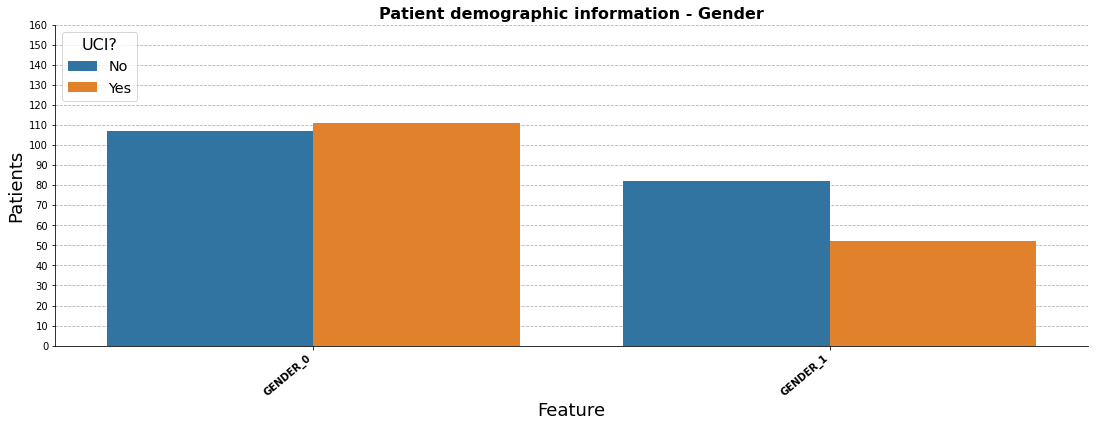

In [133]:
# separar as colunas com as Informações demográficas - Gênero
dados_info_demograficas_genero = separa_variaveis(dataset_pessoal, 11, 13)

# fazer o melt 
melt_info_demograficas_genero = cria_melt(dados_info_demograficas_genero)

# plotar o gráfico
cria_catplot(melt_info_demograficas_genero, "Patient demographic information - Gender")

<Figure size 864x432 with 0 Axes>

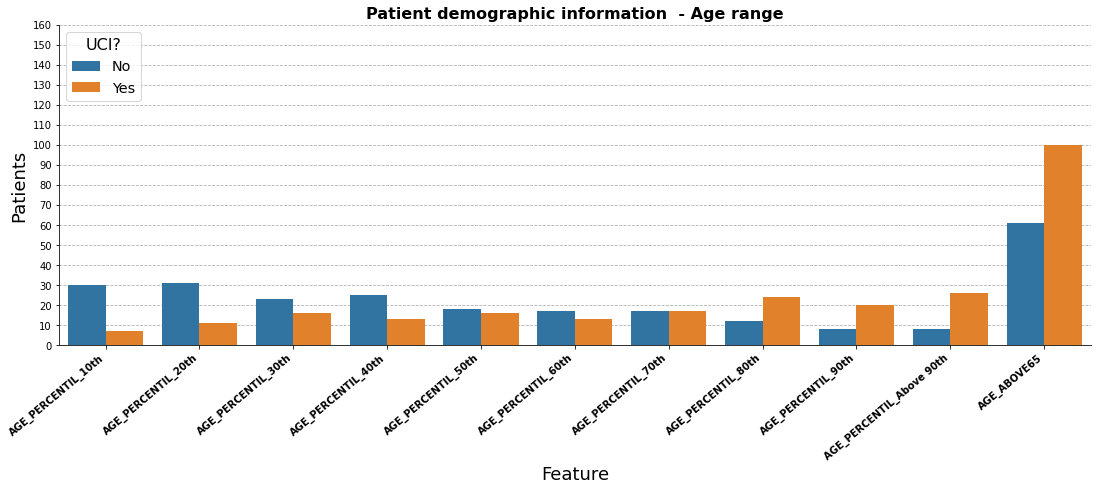

In [134]:
# separar as colunas com as Informações demográficas - Faixa etária
dados_info_demograficas_idade = separa_variaveis(dataset_pessoal, 0, 11)

# fazer o melt 
melt_info_demograficas_idade = cria_melt(dados_info_demograficas_idade)

# plotar o gráfico
cria_catplot(melt_info_demograficas_idade, "Patient demographic information  - Age range")


**Doenças pré-existentes**

<Figure size 864x432 with 0 Axes>

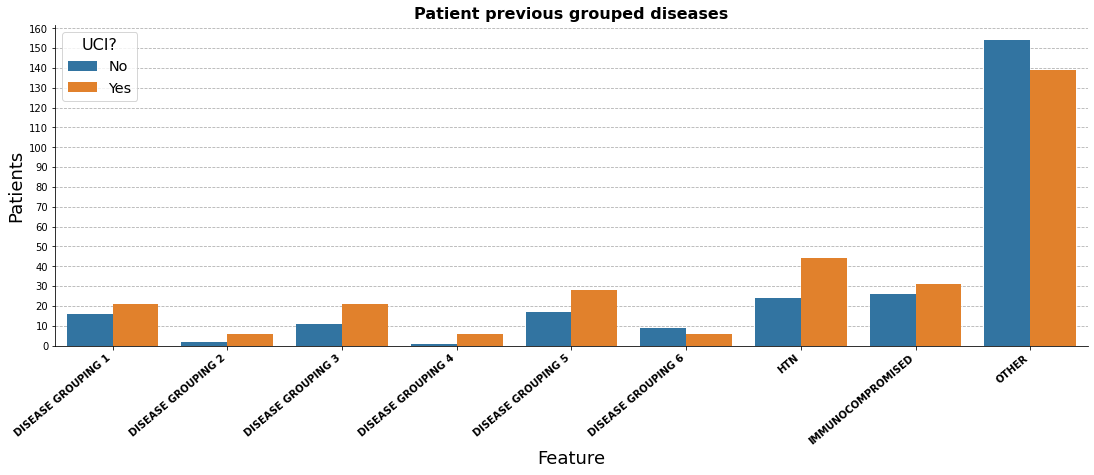

In [135]:
# separar as colunas das Doenças pré-existentes
dados_doencas_preexistente = separa_variaveis(dataset_pessoal, 15, 24)

# fazer o melt
melt_doencas_preexistente  = cria_melt(dados_doencas_preexistente)

# plotar o gráfico
cria_catplot(melt_doencas_preexistente, "Patient previous grouped diseases")

**Exames de sangue e sinais vitais**

In [136]:
# separar as colunas que tem os dados dos Exames de sangue e Sinais vitais
dados_exames = separa_variaveis(dataset_pessoal, 24, 241)

# pegar o nome das colunas
variaveis_continuas = dados_exames.columns

# fazer o melt
melt_exames = cria_melt(dados_exames)

# colocar o nome das variáveis no índice
melt_exames = melt_exames.set_index("variavel")

In [137]:
# temos 217 variáveis de exames de sangue e sinais vitais
len(variaveis_continuas)

217

In [138]:
# temos 76.032  linhas, com 217 variáveis diferentes
melt_exames

,ICU,valor
variavel,,
ALBUMIN_MEDIAN,1,0.605263
ALBUMIN_MEDIAN,1,0.605263
ALBUMIN_MEDIAN,0,-0.263158
ALBUMIN_MEDIAN,0,0.605263
ALBUMIN_MEDIAN,0,0.605263
...,...,...
OXYGEN_SATURATION_DIFF_REL,1,-1.000000
OXYGEN_SATURATION_DIFF_REL,0,-1.000000
OXYGEN_SATURATION_DIFF_REL,1,-1.000000


In [139]:
# selecionando as variáveis para plotar em gráficos separados, pois são muitas variáveis
df1 = seleciona_variaveis(melt_exames, 0, 25)
df2 = seleciona_variaveis(melt_exames, 25, 50)
df3 = seleciona_variaveis(melt_exames, 50, 75)
df4 = seleciona_variaveis(melt_exames, 75, 100)
df5 = seleciona_variaveis(melt_exames, 100, 125)
df6 = seleciona_variaveis(melt_exames, 125, 150)
df7 = seleciona_variaveis(melt_exames, 150, 175)
df8 = seleciona_variaveis(melt_exames, 175, 200)
df9 = seleciona_variaveis(melt_exames, 200, 218)

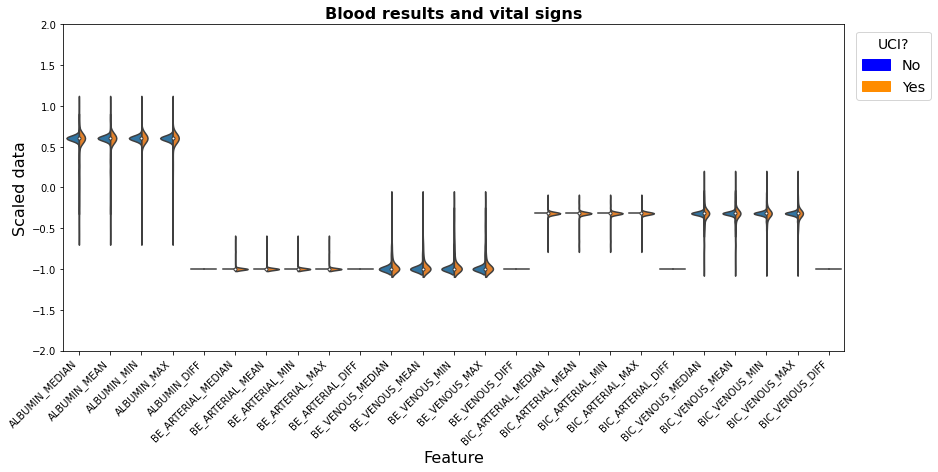

In [140]:
cria_violinplot(df1)

In [141]:
# selecionei as variáveis que apresentam o mesmo valor para quem foi e para quem não foi para UTI
# como essas variáveis têm o mesmo valor, serão exluídas do dataset

excluir1 = ["ALBUMIN_DIFF", "BE_ARTERIAL_DIFF", "BE_VENOUS_DIFF", "BIC_ARTERIAL_DIFF", "BIC_VENOUS_DIFF"]

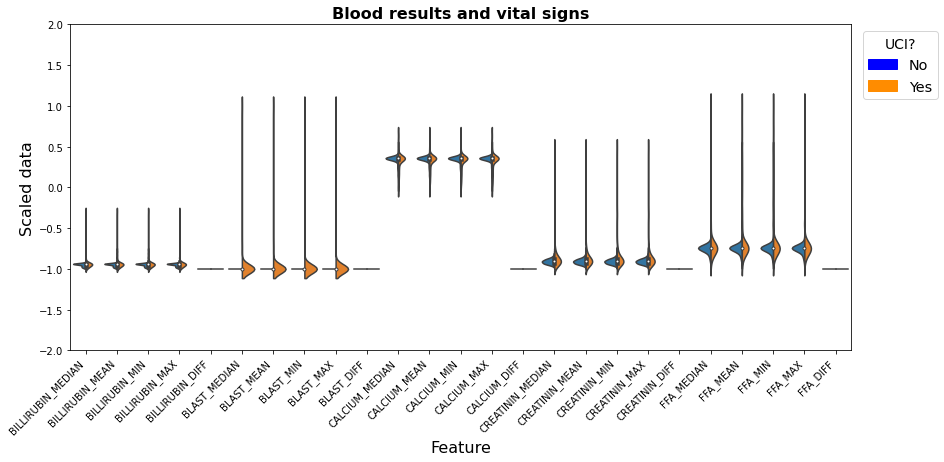

In [142]:
cria_violinplot(df2)

In [143]:
excluir2 = ["BILLIRUBIN_DIFF", "BLAST_DIFF", "CALCIUM_DIFF", "CREATININ_DIFF", "FFA_DIFF"]

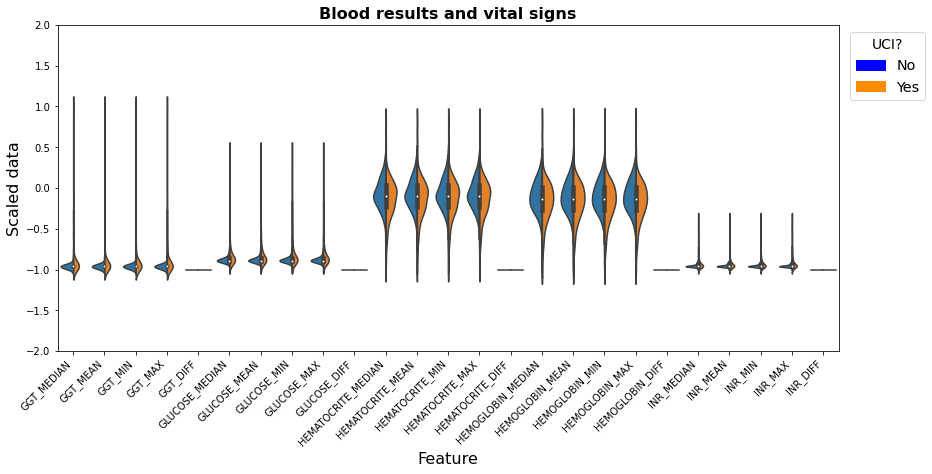

In [144]:
cria_violinplot(df3)

In [145]:
excluir3 = ["GGT_DIFF", "GLUCOSE_DIFF", "HEMATOCRITE_DIFF", "HEMOGLOBIN_DIFF", "INR_DIFF"]

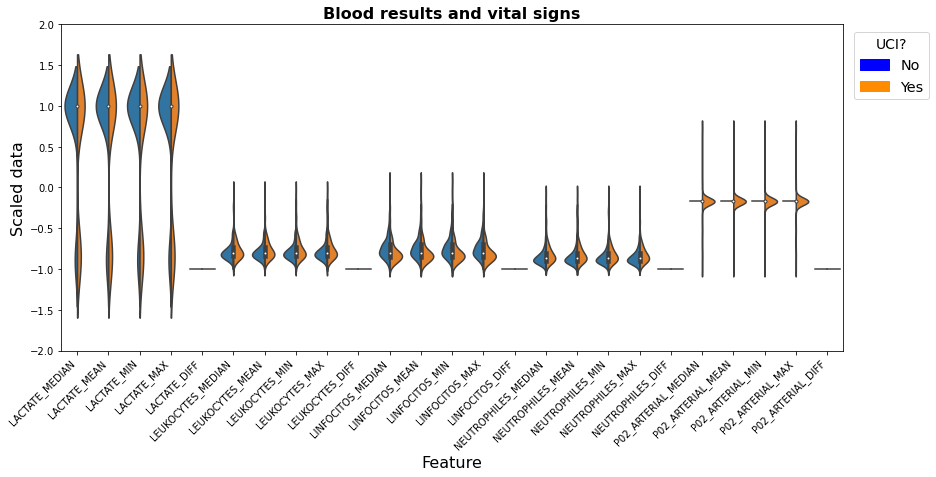

In [146]:
cria_violinplot(df4)

In [147]:
excluir4 = ["LACTATE_DIFF", "LEUKOCYTES_DIFF", "LINFOCITOS_DIFF", "NEUTROPHILES_DIFF", "P02_ARTERIAL_DIFF"]

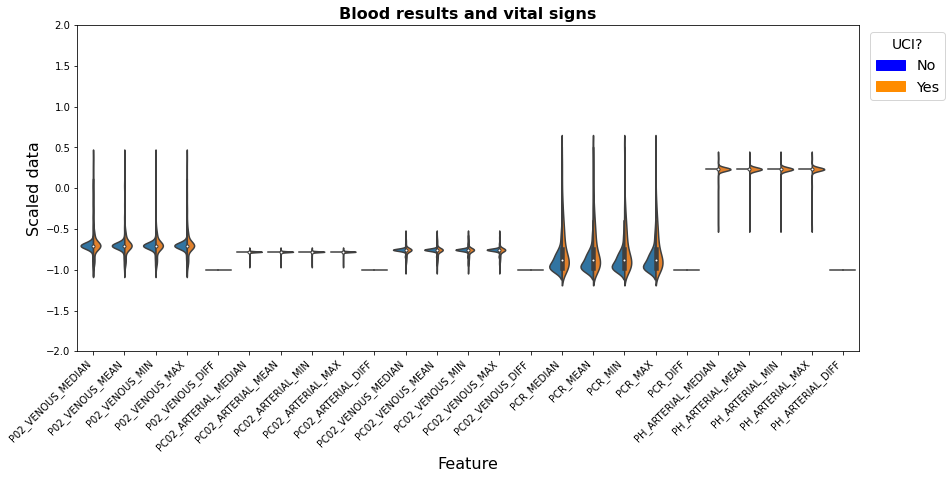

In [148]:
cria_violinplot(df5)

In [149]:
excluir5 = ["P02_VENOUS_DIFF", "PC02_ARTERIAL_DIFF", "PC02_VENOUS_DIFF", "PCR_DIFF", "PH_ARTERIAL_DIFF"]

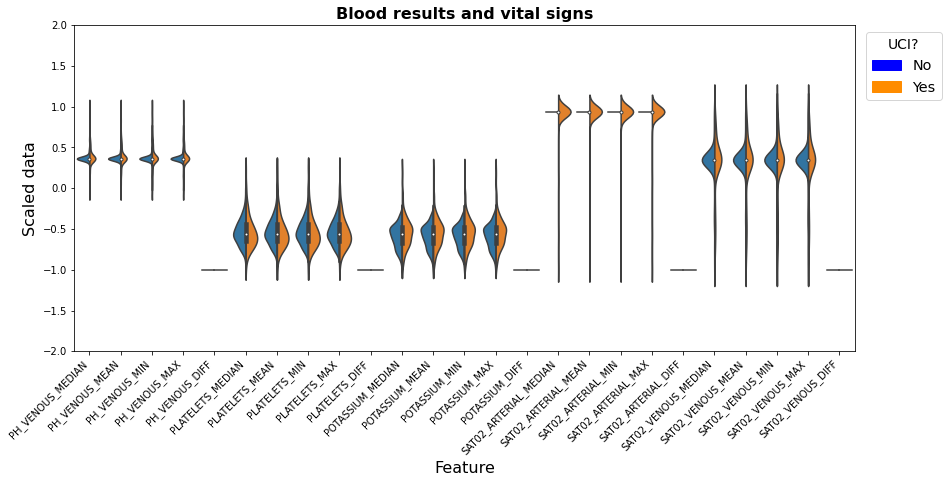

In [150]:
cria_violinplot(df6)

In [151]:
excluir6 = ["PH_VENOUS_DIFF", "PLATELETS_DIFF", "POTASSIUM_DIFF", "SAT02_ARTERIAL_DIFF", "SAT02_VENOUS_DIFF"]

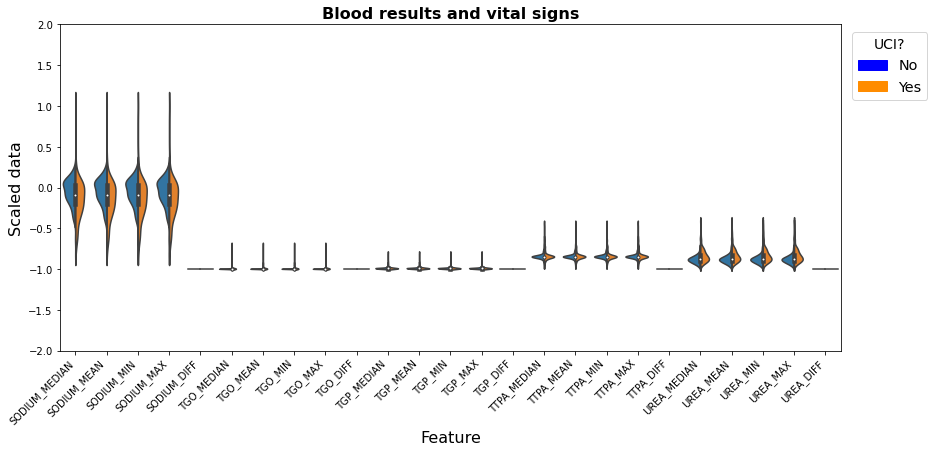

In [152]:
cria_violinplot(df7)

In [153]:
excluir7 = ["SODIUM_DIFF", "TGO_DIFF", "TGP_DIFF", "TTPA_DIFF", "UREA_DIFF"]

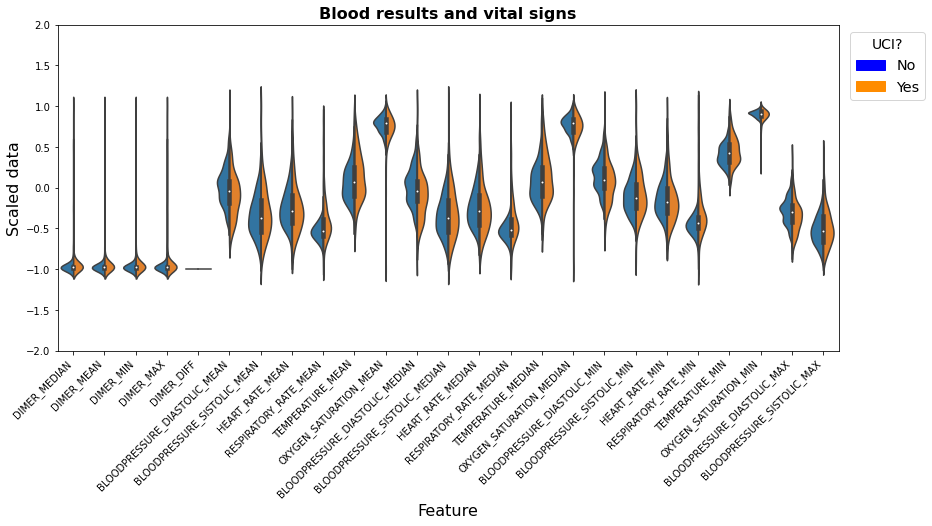

In [154]:
cria_violinplot(df8)

In [155]:
excluir8 = ["DIMER_DIFF"]

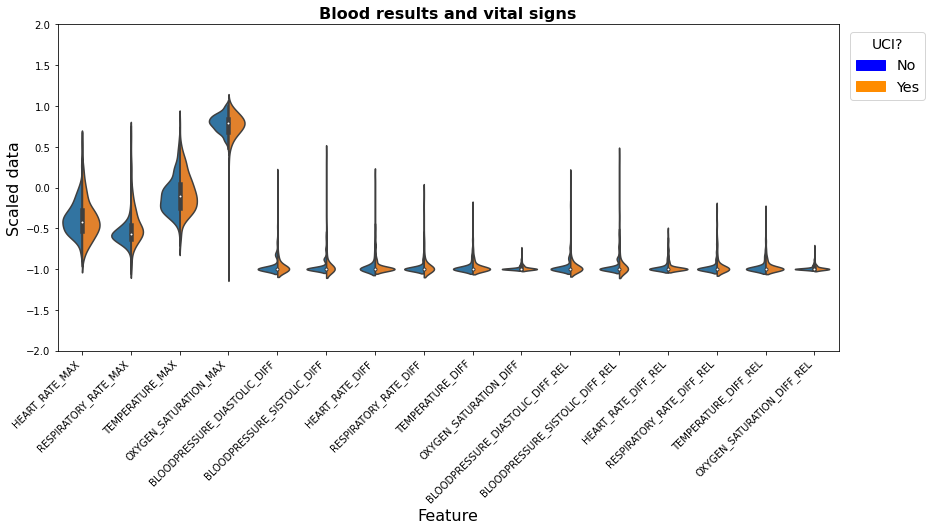

In [156]:
cria_violinplot(df9)

**Remover as variáveis contínuas que têm o mesmo valor**

In [157]:
# concatenar todas as listas com as variáveis a serem excluídas do dataset
excluir = excluir1 + excluir2 + excluir3 + excluir4 + excluir5 + excluir6 + excluir7 + excluir8

# 36 variáveis serão removidas do dataset
len(excluir)

36

In [158]:
# removendo essas variáveis do dataset
dataset_pessoal = dataset_pessoal.drop(excluir, axis=1)
dataset_pessoal.head()

,AGE_PERCENTIL_10th,AGE_PERCENTIL_20th,AGE_PERCENTIL_30th,AGE_PERCENTIL_40th,AGE_PERCENTIL_50th,AGE_PERCENTIL_60th,AGE_PERCENTIL_70th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th,AGE_ABOVE65,GENDER_0,GENDER_1,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,...,DIMER_MEAN,DIMER_MIN,DIMER_MAX,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
0,0,0,0,0,0,1,0,0,0,0,1,1,0,5,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,...,-0.994912,-0.994912,-0.994912,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1
1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,...,-0.978029,-0.978029,-0.978029,-0.489712,-0.685470,-0.048218,-0.645951,0.357143,0.935673,-0.506173,-0.815385,-0.056604,-0.517241,0.357143,0.947368,-0.525773,-0.5125,-0.111111,-0.714286,0.604396,0.959596,-0.435897,-0.491892,0.000000,-0.575758,0.101449,1.000000,-0.547826,-0.533742,-0.603053,-0.764706,-1.000000,-0.959596,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000,-0.961262,1
2,0,0,0,1,0,0,0,0,0,0,0,0,1,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.263158,-0.263158,-0.263158,-0.263158,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,...,-0.978029,-0.978029,-0.978029,0.012346,-0.369231,-0.528302,-0.457627,-0.285714,0.684211,0.012346,-0.369231,-0.528302,-0.448276,-0.285714,0.684211,0.175258,-0.1125,-0.384615,-0.357143,0.208791,0.878788,-0.299145,-0.556757,-0.626866,-0.515152,-0.420290,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0
3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,...,-1.000000,-1.000000,-1.000000,0.333333,-0.153846,0.160377,-0.593220,0.285714,0.868421,0.333333,-0.153846,0.160377,-0.586207,0.285714,0.868421,0.443299,0.0000,0.196581,-0.571429,0.538462,0.939394,-0.076923,-0.351351,-0.044776,-0.575758,0.072464,0.894737,-1.000000,-0.877301,-0.923664,-0.882353,-0.952381,-0.979798,-1.000000,-0.883669,-0.956805,-0.870968,-0.953536,-0.980333,0
4,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,...,-1.000000,-1.000000,-1

In [159]:
dataset_pessoal.shape

(352, 205)

<font color="red">**Resumo 2**

- Criamos as colunas GENDER_0 e GENDER_1
- Plotamos o gráfico com as variáveis das Informações Demográficas e Doenças Pré-existentes, e foi possível visualizar a quantidade de pacientes que foi ou não para UTI para cada variável

- Também plotamos gráficos com as variáveis dos Exames de Sangue e Sinais Vitais e foi possível veririfcar a distribuição dos valores em relação aos pacientes que foram ou não para UTI. Esses gráficos nos permitiam identificar variáveis que possuiam o mesmo valor e, por isso, as eliminamos do dataset. Foram eliminadas 36 variáveis.

- Terminamos com 352 pacientes (linhas) x 205 variáveis (colunas)

**Redução das variáveis com alta correlação**

Dados com muitas variáveis podem tornar o algoritmo mais lento, além do risco do nosso modelo ficar superajustado *(overfitting)* aos dados de treinamento, não sendo capaz de generalizar quando submetido aos dados de teste.

Além disso, um modelo mais simples, mais parcimonioso, é preferível e, de modo geral, um modelo com menos variáveis se torna mais simples. [*Keep it simple!*](https://pt.wikipedia.org/wiki/Princ%C3%ADpio_KISS)

E como já dizia Carl Sagan: **"*Alegações extraordinárias requerem evidências extraordinárias*"**. 

Por isso, temos que fazer a seleção *(feature selection)* de quais variáveis iremos utilizar no nosso modelo.

Primeiro, iremos remover as variáveis que possuem alta correlação (> 0.9)


In [160]:
# colunas que têm as variáveis contínuas 
dataset_pessoal.iloc[:, 24:-1].head()

,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,...,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL
0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-0.317073,-0.317073,-0.317073,-0.317073,-0.938950,-0.938950,-0.938950,-0.938950,-1.0,-1.0,-1.0,-1.0,0.183673,0.183673,0.183673,0.183673,-0.868365,-0.868365,-0.868365,-0.868365,-0.742004,-0.742004,-0.742004,-0.742004,...,-0.994912,-0.994912,-0.994912,-0.994912,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
1,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-0.317073,-0.317073,-0.317073,-0.317073,-0.938950,-0.938950,-0.938950,-0.938950,-1.0,-1.0,-1.0,-1.0,0.357143,0.357143,0.357143,0.357143,-0.912243,-0.912243,-0.912243,-0.912243,-0.742004,-0.742004,-0.742004,-0.742004,...,-0.978029,-0.978029,-0.978029,-0.978029,-0.489712,-0.685470,-0.048218,-0.645951,0.357143,0.935673,-0.506173,-0.815385,-0.056604,-0.517241,0.357143,0.947368,-0.525773,-0.5125,-0.111111,-0.714286,0.604396,0.959596,-0.435897,-0.491892,0.000000,-0.575758,0.101449,1.000000,-0.547826,-0.533742,-0.603053,-0.764706,-1.000000,-0.959596,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000,-0.961262
2,-0.263158,-0.263158,-0.263158,-0.263158,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-0.317073,-0.317073,-0.317073,-0.317073,-0.972789,-0.972789,-0.972789,-0.972789,-1.0,-1.0,-1.0,-1.0,0.326531,0.326531,0.326531,0.326531,-0.968861,-0.968861,-0.968861,-0.968861,-0.194030,-0.194030,-0.194030,-0.194030,...,-0.978029,-0.978029,-0.978029,-0.978029,0.012346,-0.369231,-0.528302,-0.457627,-0.285714,0.684211,0.012346,-0.369231,-0.528302,-0.448276,-0.285714,0.684211,0.175258,-0.1125,-0.384615,-0.357143,0.208791,0.878788,-0.299145,-0.556757,-0.626866,-0.515152,-0.420290,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
3,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-0.317073,-0.317073,-0.317073,-0.317073,-0.935113,-0.935113,-0.935113,-0.935113,-1.0,-1.0,-1.0,-1.0,0.357143,0.357143,0.357143,0.357143,-0.913659,-0.913659,-0.913659,-0.913659,-0.829424,-0.829424,-0.829424,-0.829424,...,-1.000000,-1.000000,-

In [161]:
#  chamando a função, coloquei o valor de corte = 0.9
dataset_pessoal = remove_alta_correlacao(dataset_pessoal, 0.9)

134 variáveis possuem correlação maior do que 0.9, portanto serão removidas


In [162]:
dataset_pessoal.shape

(352, 71)

<font color="red">**Resumo 3**

- Para redução da dimensão, criamos uma matriz de correlação das variáveis contínuas e removemos as variáveis com correlação > 0.9. 

- 134 variáveis foram removidas.

- Terminamos esse processamento com 352 pacientes (linhas) x 71 variáveis (colunas)




In [163]:
# exportei esse df
dataset_pessoal.to_csv("dataset_pessoal.csv", index=False)

#<font color="blue">**2 - CONSTRUÇÃO DO MODELO DE MACHINE LEARNING**



Os testes dos modelos de Classificação Supervisionada foram treinados com o dataset_sirio e estão [nesse Apêndice](https://colab.research.google.com/drive/1EHRrKmxzAqVSUHyXlIaKbpMhpzQYnLUH?usp=sharing)

In [164]:
# resultado: classificador e hiperparâmtros
classificador = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto', max_leaf_nodes=None, 
                       max_samples=None, min_impurity_decrease=0.0004, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2, min_weight_fraction_leaf=0.0, 
                       n_estimators=50, n_jobs=None, oob_score=True, random_state=0, verbose=0,
                       warm_start=False)

#<font color="blue">**3 - FEATURE IMPORTANCE**

###**Funções**

In [165]:
'''
Essa função separa em dados de treino e teste
'''
def separa_treino_teste(dados):

  x = dados.drop("ICU", axis=1)
  y = dados["ICU"]


  x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, stratify=y, random_state=0)

  return x_treino, x_teste, y_treino, y_teste

In [166]:
'''
Essa função separa novamente os dados de treino e teste e
seleciona as variáveis mais importantes para o modelo
'''

def feature_importance(modelo, dados):

  x_treino, _, y_treino, _ = separa_treino_teste(dados)

  modelo.fit(x_treino, y_treino)

  fi_df = pd.DataFrame({"VARIAVEL": list(x_treino.columns), 
                        "IMPORTANCIA": modelo.feature_importances_})
  
  fi_df = fi_df.sort_values("IMPORTANCIA", ascending=False)

  return fi_df

In [167]:
'''
Plota gráfico com as features importance
'''

def plota_features_importance(fi_df):

  plt.figure(figsize=(10, 8))

  plt.barh(y=fi_df["VARIAVEL"], width=fi_df['IMPORTANCIA'], height=0.5)
  
  plt.title("Feature Importance", fontsize=20, fontweight="bold", pad=20)
  plt.xlabel('Importance', fontsize=20)


In [168]:
'''
Essa função remove do dataset as features com importância igual a zero 
e devolve o novo dataset com as features removidas
'''

def remove_feature_importancia_zero(fi_df, dados):
  excluir = fi_df.query("IMPORTANCIA == 0.0")["VARIAVEL"].values

  df = dados.drop(excluir, axis=1)

  return df

In [169]:
'''
Verifica se ainda há features com valor zero 
'''
def verifica_e_excluiu_feature_zero(classificador, dataset):
  # feature importance dos dataset_sirio
  fi_df = feature_importance(classificador, dataset)   

  # excluir do dataset as features com importancia = 0
  dataset = remove_feature_importancia_zero(fi_df, dataset)    

  # imprime se ainda há features com importância = 0
  print(fi_df[fi_df.IMPORTANCIA == 0])

  return dataset, fi_df

###**Selecionando as features - dataset_sirio**

In [170]:
# verificar se há feature = 0
dataset_sirio, fi_sirio = verifica_e_excluiu_feature_zero(classificador, dataset_sirio)


              VARIAVEL  IMPORTANCIA
6   DISEASE GROUPING 2          0.0
10  DISEASE GROUPING 6          0.0
12                GASO          0.0
8   DISEASE GROUPING 4          0.0


In [171]:
# verificar se ainda há feature = 0
dataset_sirio, fi_sirio = verifica_e_excluiu_feature_zero(classificador, dataset_sirio)

             VARIAVEL  IMPORTANCIA
5  DISEASE GROUPING 1          0.0


In [172]:
# verificar se ainda há feature = 0
dataset_sirio, fi_sirio = verifica_e_excluiu_feature_zero(classificador, dataset_sirio)

             VARIAVEL  IMPORTANCIA
6  DISEASE GROUPING 5          0.0


In [173]:
# não tem mais features = 0
dataset_sirio, fi_sirio = verifica_e_excluiu_feature_zero(classificador, dataset_sirio)

Empty DataFrame
Columns: [VARIAVEL, IMPORTANCIA]
Index: []


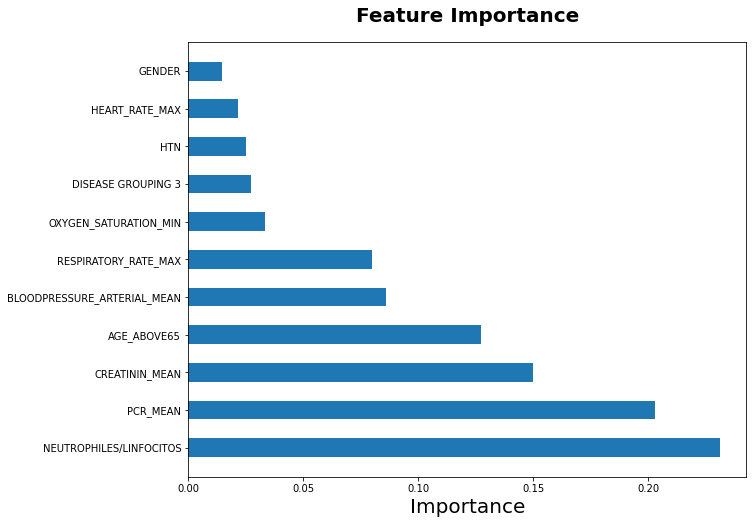

In [174]:
plota_features_importance(fi_sirio)

###**Selecionando as features - dataset_pessoal**

In [175]:
# remover AGE_PERCENTIL e GENDER 
dataset_pessoal = dataset_pessoal.drop(["GENDER", "AGE_PERCENTIL"], axis=1)

In [176]:
# verificar se há feature = 0
dataset_pessoal, fi_pessoal = verifica_e_excluiu_feature_zero(classificador, dataset_pessoal)


                        VARIAVEL  IMPORTANCIA
53                   TTPA_MEDIAN          0.0
48         SAT02_ARTERIAL_MEDIAN          0.0
44            PH_ARTERIAL_MEDIAN          0.0
62  BLOODPRESSURE_DIASTOLIC_DIFF          0.0
64               HEART_RATE_DIFF          0.0
65         RESPIRATORY_RATE_DIFF          0.0
66              TEMPERATURE_DIFF          0.0
52                    TGP_MEDIAN          0.0
0             AGE_PERCENTIL_10th          0.0
41          PC02_ARTERIAL_MEDIAN          0.0
39           P02_ARTERIAL_MEDIAN          0.0
2             AGE_PERCENTIL_30th          0.0
3             AGE_PERCENTIL_40th          0.0
4             AGE_PERCENTIL_50th          0.0
5             AGE_PERCENTIL_60th          0.0
6             AGE_PERCENTIL_70th          0.0
7             AGE_PERCENTIL_80th          0.0
8             AGE_PERCENTIL_90th          0.0
12                      GENDER_1          0.0
13            DISEASE GROUPING 1          0.0
14            DISEASE GROUPING 2  

In [177]:
# verificar se ainda há feature = 0
dataset_pessoal, fi_pessoal = verifica_e_excluiu_feature_zero(classificador, dataset_pessoal)


             VARIAVEL  IMPORTANCIA
25       DIMER_MEDIAN          0.0
4   BIC_VENOUS_MEDIAN          0.0
2            GENDER_0          0.0


In [178]:
# verificar se ainda há feature = 0
dataset_pessoal, fi_pessoal = verifica_e_excluiu_feature_zero(classificador, dataset_pessoal)

               VARIAVEL  IMPORTANCIA
19  SAT02_VENOUS_MEDIAN          0.0
2                   HTN          0.0


In [179]:
# verificar se ainda há feature = 0
dataset_pessoal, fi_pessoal = verifica_e_excluiu_feature_zero(classificador, dataset_pessoal)

                   VARIAVEL  IMPORTANCIA
0  AGE_PERCENTIL_Above 90th          0.0


In [180]:
# verificar se ainda há feature = 0
dataset_pessoal, fi_pessoal = verifica_e_excluiu_feature_zero(classificador, dataset_pessoal)

             VARIAVEL  IMPORTANCIA
1   BILLIRUBIN_MEDIAN          0.0
22    HEART_RATE_MEAN          0.0


In [181]:
# verificar se ainda há feature = 0
dataset_pessoal, fi_pessoal = verifica_e_excluiu_feature_zero(classificador, dataset_pessoal)

                       VARIAVEL  IMPORTANCIA
10            P02_VENOUS_MEDIAN          0.0
24  BLOODPRESSURE_SISTOLIC_DIFF          0.0


In [182]:
# Não tem mais feature = 0
dataset_pessoal, fi_pessoal = verifica_e_excluiu_feature_zero(classificador, dataset_pessoal)

Empty DataFrame
Columns: [VARIAVEL, IMPORTANCIA]
Index: []


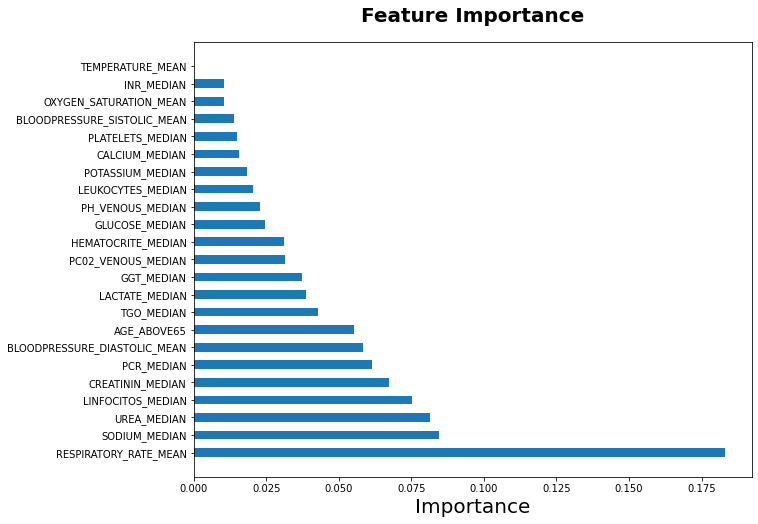

In [184]:
plota_features_importance(fi_pessoal)

#**4 - TESTAR MODELO MACHINE LEARNING**

##**Funções**

In [185]:
'''
Essa função faz a avaliação do modelo treinado com os dados de teste
Plota a curva ROC 
''' 

def testa_modelo(modelo, x_treino, y_treino, x_teste, y_teste, nome_modelo): 

  modelo.fit(x_treino, y_treino)
 
  # probabilidade de y com os dados de teste
  y_pred_proba = modelo.predict_proba(x_teste)

  # plotar a curva ROC
  fig, ax = plt.subplots(figsize=(6,6))

  ax.set_title(f"ROC Curve - {nome_modelo}", fontsize=18, fontweight="bold")
  ax.grid(linestyle='--')

  plot_roc_curve(modelo, x_teste, y_teste, ax=ax)

  ax.set_ylabel("True Positive Rate", fontsize=18)
  ax.set_xlabel("False Positive Rate", fontsize=18)
  ax.legend(fontsize="large", loc="lower right");

In [186]:
'''
Essa função plota a matriz de confusão dos dados de teste e imprime a acurácia 
'''
def matriz_confusao(modelo, x_treino, y_treino, x_teste, y_teste):

  modelo.fit(x_treino, y_treino)

  fig, ax = plt.subplots(figsize=(7,7))

  plot_confusion_matrix(modelo, x_teste, y_teste, ax=ax, normalize="true", cmap="Blues")

  ax.set_title("Confusion matrix\n(Normalized values)", fontsize=16, fontweight="bold")
  ax.set_xlabel("Predicted label", fontsize=18)
  ax.set_ylabel("True label", fontsize=18)
  
  y_pred = modelo.predict(x_teste)
  acc = accuracy_score(y_teste, y_pred)
  
  print(f"Acurácia = {acc:.3f}")

##**dataset_sirio**

In [187]:
# separar novamente os dados de treino e teste, com as features importance definidas
x_treino_sirio, x_teste_sirio, y_treino_sirio, y_teste_sirio = separa_treino_teste(dataset_sirio)

# treinar modelo
classificador.fit(x_treino_sirio, y_treino_sirio)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0004, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=True, random_state=0, verbose=0,
                       warm_start=False)

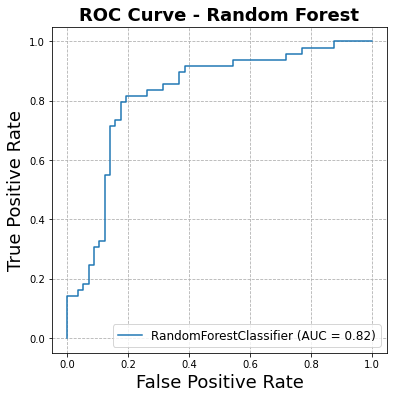

In [189]:
testa_modelo(classificador, x_treino_sirio, y_treino_sirio, x_teste_sirio, y_teste_sirio, "Random Forest")

Acurácia = 0.783


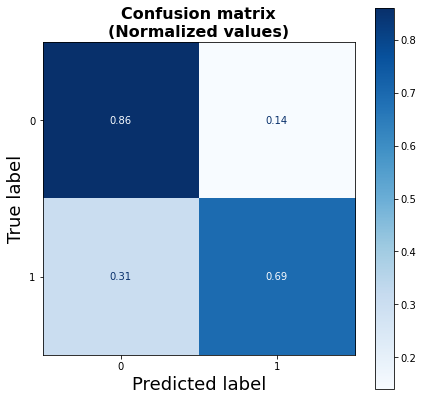

In [190]:
matriz_confusao(classificador, x_treino_sirio, y_treino_sirio, x_teste_sirio, y_teste_sirio)

##**dataset_pessoal**

In [202]:
# separar novamente os dados de treino e teste, com as features importance definidas
x_treino_pes, x_teste_pes, y_treino_pes, y_teste_pes = separa_treino_teste(dataset_pessoal)

# treinar modelo
classificador.fit(x_treino_pes, y_treino_pes)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0004, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=True, random_state=0, verbose=0,
                       warm_start=False)

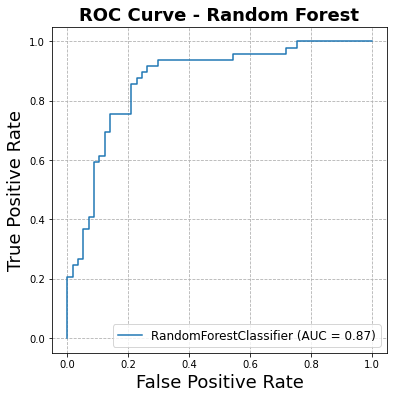

In [203]:
testa_modelo(classificador, x_treino_pes, y_treino_pes, x_teste_pes, y_teste_pes, "Random Forest")

Acurácia = 0.764


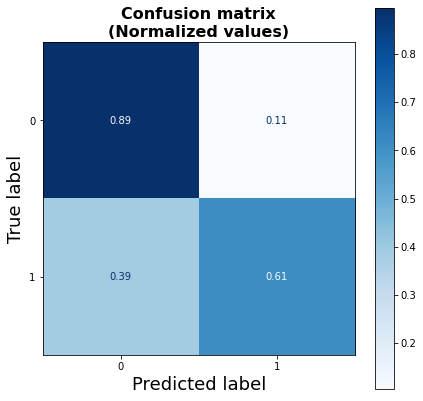

In [204]:
matriz_confusao(classificador, x_treino_pes, y_treino_pes, x_teste_pes, y_teste_pes)

##**Features em comum**

In [205]:
# guardar as variáveis em um conjunto
features_sirio = set(fi_sirio["VARIAVEL"].values)

In [206]:
# guardar as variáveis em um conjunto
features_pessoal = set(fi_pessoal["VARIAVEL"].values)

**Ver quais features os datasets têm em comum:**

In [207]:
features_sirio.intersection(features_pessoal)

{'AGE_ABOVE65'}

In [197]:
dataset_sirio.shape

(352, 12)

In [198]:
dataset_pessoal.shape

(352, 24)

<font color="red">**Resumo**

Shape final: 

- dataset_sirio: 352 linhas x 12 colunas

- dataset_pessoal: 352 linhas x 24 colunas

Feature em comum:

- AGE_ABOVE65 



In [199]:
classificador.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0004, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=True, random_state=0, verbose=0,
                       warm_start=False)>

In [200]:
fi_sirio


,VARIAVEL,IMPORTANCIA
6,NEUTROPHILES/LINFOCITOS,0.231013
9,PCR_MEAN,0.202822
10,CREATININ_MEAN,0.149868
0,AGE_ABOVE65,0.127492
2,BLOODPRESSURE_ARTERIAL_MEAN,0.086200
3,RESPIRATORY_RATE_MAX,0.080085
7,OXYGEN_SATURATION_MIN,0.033544
5,DISEASE GROUPING 3,0.027334
4,HTN,0.025314
8,HEART_RATE_MAX,0.021535


#**5 - RESULTADO FINAL**

- **Classificador escolhido:** Random Forest Classifier

- **Hiperparâmetros:**

  bootstrap = True
  
  ccp_alpha = 0.0
  
  class_weight = None
                       
  criterion = 'gini'
  
  max_depth = 2
  
  max_features = 'auto'
  
  max_leaf_nodes = None
  
  max_samples = None
  
  min_impurity_decrease = 0.0004
  
  min_impurity_split = None
                       
  min_samples_leaf = 10
  
  min_samples_split = 2

  min_weight_fraction_leaf = 0.0
  
  n_estimators = 50
  
  n_jobs = None
  
  oob_score = True
  
  random_state = 0
  
  verbose = 0
  
  warm_start = False







#**6 - CONCLUSÃO**

- O valor de AUC e da acurácia do classificador Random Forest de ambos datasets foi maior do que os valores da *baseline* estabelecidos pelo Dummy Classifier (AUC = 0,5; Acurácia = 0,538).

- De acordo com a Matriz de Confusão, o classificador foi melhor em fazer a predição de pacientes que não precisariam de UTI, com valor de acerto igual a 0,86 e 0,89, enquanto que a predição de pacientes que precisariam de UTI foi de 0.69 e 0,61.

- Uma feature que parece ser importante é a AGE_ABOVE65, que foi a *feature importance* comum aos dois conjuntos de dados analisados, e que ficou em 4º no ranking de *feature importance* no dataset_sirio.

- Analisando as top 5 features dos dados_sirio:

  - NEUTROPHILES/LINFOCITOS estão relacionados com a resposta do sistema imune à infecção viral;
  - PCR_MEAN mede a carga viral do vírus, sendo que pacientes com maiores cargas virais podem desenvolver [quadros mais graves](https://www.nature.com/articles/s41467-020-19057-5);
  - CREATININ_MEAN é um marcador da função renal, a qual pode ser [prejudicada pelo vírus SARS-COV-2](https://www.nature.com/articles/s41581-020-00356-5#Sec53);
  - AGE_ABOVE65 é um fator de risco devido ao enfraquecimento do sistema imune com o [envelhecimento do organismo](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3582124/#:~:text=The%20effects%20of%20aging%20on,as%20robustly%20as%20the%20young.);
  - BLOODPRESSURE_ARTERIAL_MEAN, marcador de pressão arterial, pois a pressão alta é considerada um [fator de risco para a COVID-19](https://www.cdc.gov/coronavirus/2019-ncov/need-extra-precautions/people-with-medical-conditions.html#serious-heart-conditions)






In [201]:
fi_sirio.reset_index(drop=True).head(5)

,VARIAVEL,IMPORTANCIA
0,NEUTROPHILES/LINFOCITOS,0.231013
1,PCR_MEAN,0.202822
2,CREATININ_MEAN,0.149868
3,AGE_ABOVE65,0.127492
4,BLOODPRESSURE_ARTERIAL_MEAN,0.086200
